In [1]:
from pystac_client import Client

In [4]:
client = Client.open("https://earth-search.aws.element84.com/v1")
client

<Client id=earth-search-aws>

In [9]:
collections = client.get_collections()

In [10]:
for collection in collections:
    print(collection.id)

sentinel-2-pre-c1-l2a
cop-dem-glo-30
naip
cop-dem-glo-90
landsat-c2-l2
sentinel-2-l2a
sentinel-2-l1c
sentinel-2-c1-l2a
sentinel-1-grd


In [17]:
catalog = client.get_collection('sentinel-2-l2a')
catalog

<CollectionClient id=sentinel-2-l2a>

In [22]:
aoi = {

        "coordinates": [
          6.855036347111337,
          52.237589543686425
        ],
        "type": "Point"
      
    }
  


In [32]:
result = client.search(
    collections=['sentinel-2-l2a'],
    intersects=aoi,
    datetime='2025-01-01/2025-02-28',
    query=query
)
result.matched()

1

In [31]:
query = {
    "eo:cloud_cover" : {
        "gte" : 0,
        'lte':10
    }
}

In [35]:
pip install stackstac[viz]

INFO: pip is looking at multiple versions of distributed to determine which version is compatible with other requirements. This could take a while.
  Using cached argon2_cffi-23.1.0-py3-none-any.whl.metadata (5.2 kB)
  Using cached jupyter_server_terminals-0.5.3-py3-none-any.whl.metadata (5.6 kB)
  Using cached nbformat-5.10.4-py3-none-any.whl.metadata (3.6 kB)
  Using cached overrides-7.7.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached Send2Trash-1.8.3-py3-none-any.whl.metadata (4.0 kB)
  Using cached terminado-0.18.1-py3-none-any.whl.metadata (5.8 kB)
  Using cached websocket_client-1.8.0-py3-none-any.whl.metadata (8.0 kB)
  Using cached argon2_cffi_bindings-21.2.0-cp36-abi3-win_amd64.whl.metadata (6.7 kB)
  Using cached rfc3339_validator-0.1.4-py2.py3-none-any.whl.metadata (1.5 kB)
  Using cached rfc3986_validator-0.1.1-py2.py3-none-any.whl.metadata (1.7 kB)
  Using cached defusedxml-0.7.1-py2.py3-none-any.whl.metadata (32 kB)
  Using cached jupyterlab_pygments-0.3.0-py3-none-an

In [ ]:
lat,lon = 

### STACKSTAC For cloud native processing

In [4]:
from pystac_client import Client

In [8]:
api = "https://earth-search.aws.element84.com/v1"
catalog = Client.open(api)
catalog

<Client id=earth-search-aws>

In [9]:
lat, lon = 35.79615266574899, -105.80167716291561

In [10]:
items = catalog.search(
    collections=['sentinel-2-l2a'],
    intersects=dict(type="Point",coordinates = [lon,lat]),
    datetime = '2020-03-01/2020-06-01'
).item_collection()

In [11]:
print(f"total items {len(items)}")

total items 74


In [12]:
items[0]

<Item id=S2B_13SDV_20200531_1_L2A>

In [14]:
import stackstac
stack = stackstac.stack(items=items,epsg=32613)

In [15]:
stack

<xarray.DataArray 'stackstac-3b77de45fc4af46f3b4953fa0137aeef' (time: 74,
                                                                band: 32,
                                                                y: 11017,
                                                                x: 23713)> Size: 5TB
dask.array<fetch_raster_window, shape=(74, 32, 11017, 23713), dtype=float64, chunksize=(1, 1, 1024, 1024), chunktype=numpy.ndarray>
Coordinates: (12/52)
  * time                                     (time) datetime64[ns] 592B 2020-...
    id                                       (time) <U24 7kB 'S2B_13SDV_20200...
  * band                                     (band) <U12 2kB 'aot' ... 'wvp-jp2'
  * x                                        (x) float64 190kB 3.987e+05 ... ...
  * y                                        (y) float64 88kB 4.001e+06 ... 3...
    instruments                              <U3 12B 'msi'
    ...                                       ...
    raster:bands                             (band) object 256B [{'nodata': 0...
    gsd                                      (band) object 256B None 10 ... None
    common_name                              (band) object 256B None ... None
    center_wavelength                        (band) object 256B None ... None
    full_width_half_max                      (band) object 256B None ... None
    epsg                                     int64 8B 32613
Attributes:
    spec:           RasterSpec(epsg=32613, bounds=(398715.63223571365, 388967...
    crs:            epsg:32613
    transform:      | 4.69, 0.00, 398715.63|\n| 0.00,-10.07, 4000586.68|\n| 0...
    resolution_xy:  (4.68801448836818, 10.067433551210742)

#### Limiting spatial extent

In [16]:
import pyproj
x_utm, y_utm = pyproj.Proj(stack.crs)(lon,lat)


In [18]:
buffer = 2000 #meters

In [22]:
aoi = stack.loc[..., y_utm+buffer:y_utm-buffer, x_utm-buffer:x_utm + buffer]
aoi


<xarray.DataArray 'stackstac-3b77de45fc4af46f3b4953fa0137aeef' (time: 74,
                                                                band: 32,
                                                                y: 397, x: 853)> Size: 6GB
dask.array<getitem, shape=(74, 32, 397, 853), dtype=float64, chunksize=(1, 1, 397, 436), chunktype=numpy.ndarray>
Coordinates: (12/52)
  * time                                     (time) datetime64[ns] 592B 2020-...
    id                                       (time) <U24 7kB 'S2B_13SDV_20200...
  * band                                     (band) <U12 2kB 'aot' ... 'wvp-jp2'
  * x                                        (x) float64 7kB 4.256e+05 ... 4....
  * y                                        (y) float64 3kB 3.964e+06 ... 3....
    instruments                              <U3 12B 'msi'
    ...                                       ...
    raster:bands                             (band) object 256B [{'nodata': 0...
    gsd                                      (band) object 256B None 10 ... None
    common_name                              (band) object 256B None ... None
    center_wavelength                        (band) object 256B None ... None
    full_width_half_max                      (band) object 256B None ... None
    epsg                                     int64 8B 32613
Attributes:
    spec:           RasterSpec(epsg=32613, bounds=(398715.63223571365, 388967...
    crs:            epsg:32613
    transform:      | 4.69, 0.00, 398715.63|\n| 0.00,-10.07, 4000586.68|\n| 0...
    resolution_xy:  (4.68801448836818, 10.067433551210742)

In [ ]:

###eo_cloudcover works on image level, 
lowcloud = aoi[aoi["eo:cloud_cover"] < 20]
rgb = lowcloud.sel(band = ['red', 'green', 'blue'])
monthly = rgb.resample(time = "MS").median("time", keep_attrs = True)

monthly

<xarray.DataArray 'stackstac-3b77de45fc4af46f3b4953fa0137aeef' (time: 3,
                                                                band: 3,
                                                                y: 397, x: 853)> Size: 24MB
dask.array<stack, shape=(3, 3, 397, 853), dtype=float64, chunksize=(1, 2, 397, 853), chunktype=numpy.ndarray>
Coordinates: (12/21)
  * band                                     (band) <U12 144B 'red' ... 'blue'
  * x                                        (x) float64 7kB 4.256e+05 ... 4....
  * y                                        (y) float64 3kB 3.964e+06 ... 3....
    instruments                              <U3 12B 'msi'
    s2:product_type                          <U7 28B 'S2MSI2A'
    s2:datatake_type                         <U8 32B 'INS-NOBS'
    ...                                       ...
    gsd                                      (band) object 24B 10 10 10
    common_name                              (band) object 24B 'red' ... 'blue'
    center_wavelength                        (band) object 24B 0.665 0.56 0.49
    full_width_half_max                      (band) object 24B 0.038 0.045 0.098
    epsg                                     int64 8B 32613
  * time                                     (time) datetime64[ns] 24B 2020-0...
Attributes:
    spec:           RasterSpec(epsg=32613, bounds=(398715.63223571365, 388967...
    crs:            epsg:32613
    transform:      | 4.69, 0.00, 398715.63|\n| 0.00,-10.07, 4000586.68|\n| 0...
    resolution_xy:  (4.68801448836818, 10.067433551210742)

In [24]:
import dask.diagnostics as dd

with dd.ProgressBar():
    data = monthly.compute()

[########################################] | 100% Completed | 115.29 s


In [25]:
data

<xarray.DataArray 'stackstac-3b77de45fc4af46f3b4953fa0137aeef' (time: 3,
                                                                band: 3,
                                                                y: 397, x: 853)> Size: 24MB
array([[[[ 4.4135e-01,  4.6980e-01,  4.6980e-01, ...,  1.3490e-01,
           1.3490e-01,  1.7570e-01],
         [ 4.5960e-01,  4.7220e-01,  4.7220e-01, ...,  1.3720e-01,
           1.3720e-01,  1.6850e-01],
         [ 5.1820e-01,  5.4240e-01,  5.4240e-01, ...,  1.3745e-01,
           1.3745e-01,  1.6900e-01],
         ...,
         [ 1.5800e-02,  3.4000e-03,  3.4000e-03, ...,  3.8540e-01,
           3.8540e-01,  3.0975e-01],
         [-4.4500e-03, -1.0700e-02, -1.0700e-02, ...,  4.0385e-01,
           4.0385e-01,  4.7320e-01],
         [-5.2500e-03,  5.0500e-03,  5.0500e-03, ...,  3.9380e-01,
           3.9380e-01,  5.2760e-01]],

        [[ 4.4720e-01,  4.8960e-01,  4.8960e-01, ...,  1.3750e-01,
           1.3750e-01,  1.7910e-01],
         [ 4.5640e-01,  4.7805e-01,  4.7805e-01, ...,  1.3150e-01,
           1.3150e-01,  1.6650e-01],
         [ 5.1880e-01,  5.4500e-01,  5.4500e-01, ...,  1.3380e-01,
           1.3380e-01,  1.6875e-01],
...
         [-1.4500e-03, -9.4000e-03, -9.4000e-03, ...,  5.0500e-02,
           5.0500e-02,  4.3050e-02],
         [-2.5500e-03, -1.1000e-02, -1.1000e-02, ...,  5.9700e-02,
           5.9700e-02,  4.9150e-02],
         [ 5.5000e-04, -2.6500e-03, -2.6500e-03, ...,  5.7700e-02,
           5.7700e-02,  5.0150e-02]],

        [[ 3.0050e-02,  4.2450e-02,  4.2450e-02, ...,  3.0750e-02,
           3.0750e-02,  3.8800e-02],
         [ 2.8850e-02,  3.6450e-02,  3.6450e-02, ...,  3.5550e-02,
           3.5550e-02,  3.6350e-02],
         [ 3.2250e-02,  3.5300e-02,  3.5300e-02, ...,  3.2550e-02,
           3.2550e-02,  3.1900e-02],
         ...,
         [-2.1800e-02, -2.3850e-02, -2.3850e-02, ...,  2.5950e-02,
           2.5950e-02,  1.7450e-02],
         [-2.5100e-02, -2.7850e-02, -2.7850e-02, ...,  3.6750e-02,
           3.6750e-02,  2.9750e-02],
         [-2.2500e-02, -2.2900e-02, -2.2900e-02, ...,  3.4400e-02,
           3.4400e-02,  3.0100e-02]]]], shape=(3, 3, 397, 853))
Coordinates: (12/21)
  * band                                     (band) <U12 144B 'red' ... 'blue'
  * x                                        (x) float64 7kB 4.256e+05 ... 4....
  * y                                        (y) float64 3kB 3.964e+06 ... 3....
    instruments                              <U3 12B 'msi'
    s2:product_type                          <U7 28B 'S2MSI2A'
    s2:datatake_type                         <U8 32B 'INS-NOBS'
    ...                                       ...
    gsd                                      (band) object 24B 10 10 10
    common_name                              (band) object 24B 'red' ... 'blue'
    center_wavelength                        (band) object 24B 0.665 0.56 0.49
    full_width_half_max                      (band) object 24B 0.038 0.045 0.098
    epsg                                     int64 8B 32613
  * time                                     (time) datetime64[ns] 24B 2020-0...
Attributes:
    spec:           RasterSpec(epsg=32613, bounds=(398715.63223571365, 388967...
    crs:            epsg:32613
    transform:      | 4.69, 0.00, 398715.63|\n| 0.00,-10.07, 4000586.68|\n| 0...
    resolution_xy:  (4.68801448836818, 10.067433551210742)

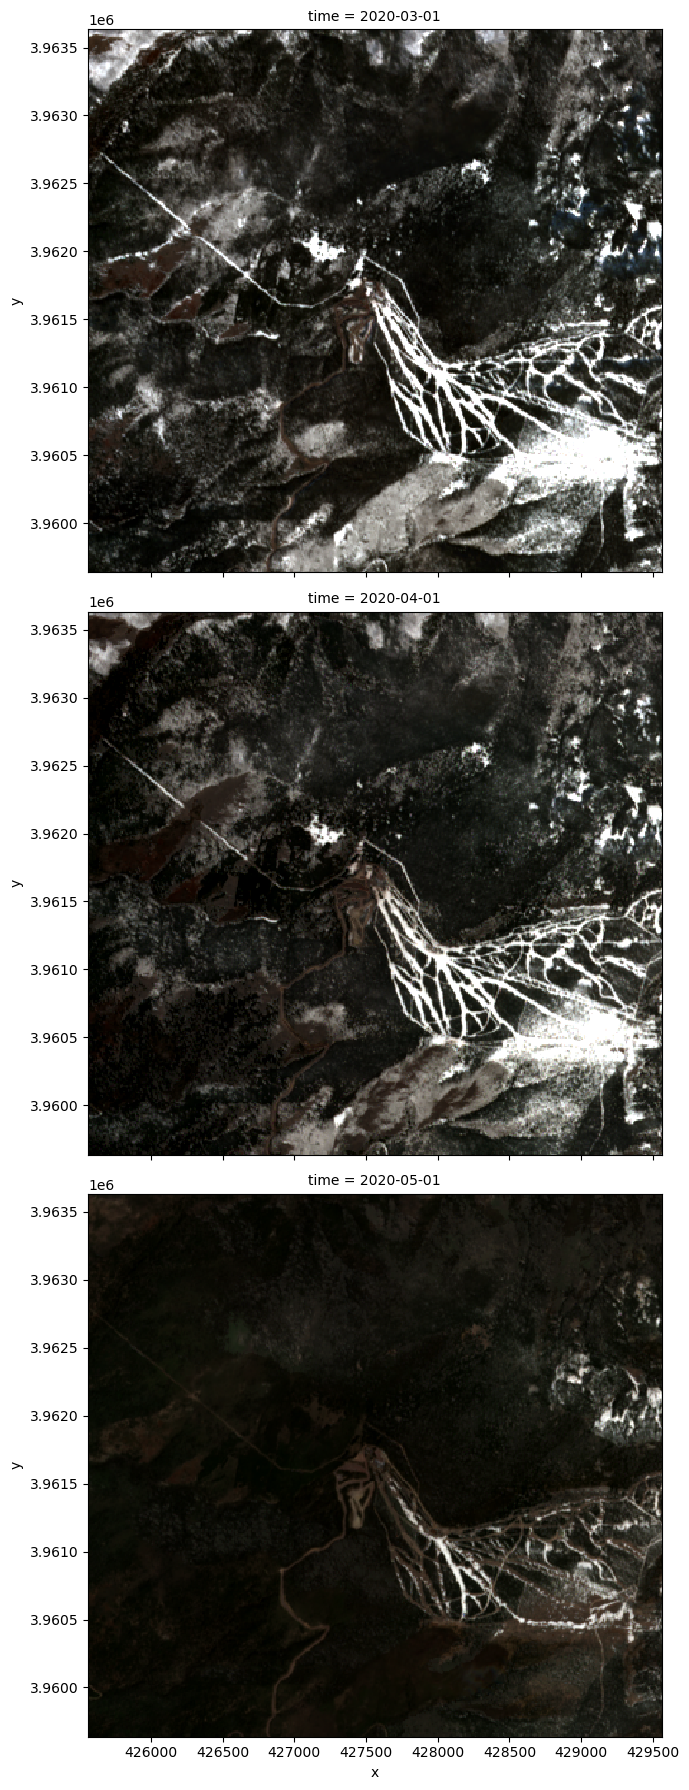

In [28]:
data.plot.imshow(row = "time", rgb = 'band', robust=True, size = 6)